In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/validasi/na/na.50.jpg
/kaggle/input/validasi/na/na.15.jpg
/kaggle/input/validasi/na/na.34.jpg
/kaggle/input/validasi/na/na.23.jpg
/kaggle/input/validasi/na/na.69.jpg
/kaggle/input/validasi/na/na.63.jpg
/kaggle/input/validasi/na/na.39.jpg
/kaggle/input/validasi/na/na.96.jpg
/kaggle/input/validasi/na/na.64.jpg
/kaggle/input/validasi/na/na.76.jpg
/kaggle/input/validasi/na/na.95.jpg
/kaggle/input/validasi/na/na.91.jpg
/kaggle/input/validasi/na/na.49.jpg
/kaggle/input/validasi/na/na.81.jpg
/kaggle/input/validasi/na/na.84.jpg
/kaggle/input/validasi/na/na.18.jpg
/kaggle/input/validasi/na/na.42.jpg
/kaggle/input/validasi/na/na.38.jpg
/kaggle/input/validasi/na/na.85.jpg
/kaggle/input/validasi/na/na.57.jpg
/kaggle/input/validasi/na/na.46.jpg
/kaggle/input/validasi/na/na.62.jpg
/kaggle/input/validasi/na/na.61.jpg
/kaggle/input/validasi/na/na.21.jpg
/kaggle/input/validasi/na/na.90.jpg
/kaggle/input/validasi/na/na.41.jpg
/kaggle/input/validasi/na/na.58.jpg
/kaggle/input/validasi/na/na

In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

2024-05-31 18:41:28.266792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 18:41:28.266888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 18:41:28.371471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(len(os.listdir('/kaggle/input/datalatih/train')))
print(len(os.listdir('/kaggle/input/validasi')))
print(len(os.listdir('/kaggle/input/testing')))

18
18
18


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Train
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)


train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/datalatih/train',
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)


# Validation
validation_datagen = ImageDataGenerator(rescale=1/255)

val_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/validasi',
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

Found 3780 images belonging to 18 classes.
Found 810 images belonging to 18 classes.


# Model VGG16

In [5]:
pretrained_model=VGG16(input_shape = (150, 150, 3), 
                            include_top = False, 
                            weights ='imagenet')

#     pretrained_model.load_weights(local_weights_file)
for layer in pretrained_model.layers:
        layer.trainable = False

x = layers.Flatten()(pretrained_model.output)        
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)


x = layers.Dense(18, activation='softmax')(x)           
model = Model(pretrained_model.input, x) 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         2,32

 Total params: 16,847,314 (64.27 MB)

 Trainable params: 2,132,626 (8.14 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
            validation_data=val_generator,
            epochs=20,
            verbose=1)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/119 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.0703 - loss: 3.1233 

I0000 00:00:1717180922.396477      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717180922.416242      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 61/119 ━━━━━━━━━━━━━━━━━━━━ 20s 358ms/step - accuracy: 0.1394 - loss: 2.8242

W0000 00:00:1717180943.839815      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.2192 - loss: 2.5531

W0000 00:00:1717180958.284990      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 67s 380ms/step - accuracy: 0.2204 - loss: 2.5487 - val_accuracy: 0.9123 - val_loss: 0.5659
Epoch 2/20


W0000 00:00:1717180967.368704      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.7025 - loss: 0.8954 - val_accuracy: 0.9593 - val_loss: 0.2075
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.8343 - loss: 0.5173 - val_accuracy: 0.9716 - val_loss: 0.1121
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 198ms/step - accuracy: 0.8645 - loss: 0.4003 - val_accuracy: 0.9790 - val_loss: 0.0793
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.9037 - loss: 0.2961 - val_accuracy: 0.9790 - val_loss: 0.0680
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.9122 - loss: 0.2683 - val_accuracy: 0.9679 - val_loss: 0.0980
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 198ms/step - accuracy: 0.9234 - loss: 0.2260 - val_accuracy: 0.9741 - val_loss: 0.0663
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.9313 - loss: 0.2118 - val_accuracy: 0.9741 - val_loss: 0.0641
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.9400 - loss: 0.1788 - val

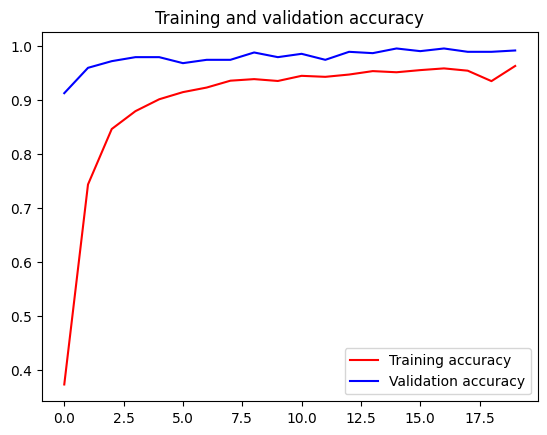

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

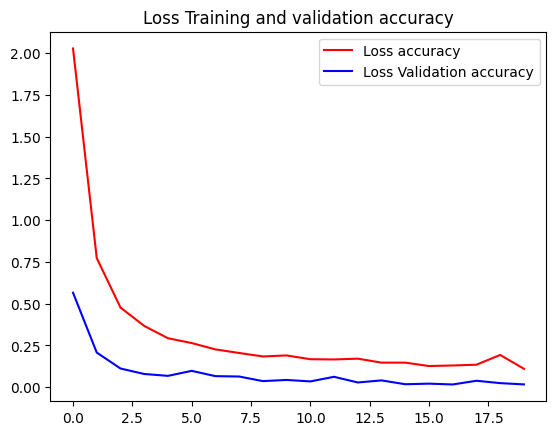

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Loss accuracy')
plt.plot(epochs, val_loss, 'b', label='Loss Validation accuracy')
plt.title('Loss Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [9]:
import numpy as np
from sklearn.metrics import classification_report

test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator untuk data pelatihan
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/testing',
    target_size=(150,150),
    batch_size=32,  # Anda dapat menyesuaikan batch_size sesuai kebutuhan Anda
    class_mode='categorical',  # Pastikan class_mode sesuai dengan jenis klasifikasi Anda
    shuffle=False  # Set shuffle=False untuk menjaga urutan data tetap
)
from sklearn.metrics import classification_report
# Prediksi menggunakan model
predIdxs = model.predict(test_generator)

# Konversi prediksi ke label kelas
predIdxs = np.argmax(predIdxs, axis=1)

# Cetak laporan klasifikasi
print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

Found 810 images belonging to 18 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/26 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step

W0000 00:00:1717181459.315641      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step
              precision    recall  f1-score   support

          ba       1.00      0.98      0.99        45
          ca       1.00      1.00      1.00        45
          da       1.00      1.00      1.00        45
          ga       1.00      0.98      0.99        45
          ha       1.00      1.00      1.00        45
          ja       1.00      1.00      1.00        45
          ka       0.98      1.00      0.99        45
          la       1.00      1.00      1.00        45
          ma       1.00      1.00      1.00        45
          na       1.00      1.00      1.00        45
         nga       0.98      1.00      0.99        45
         nya       0.96      1.00      0.98        45
          pa       1.00      1.00      1.00        45
          ra       1.00      1.00      1.00        45
          sa       1.00      0.98      0.99        45
          ta       1.00      0.91      0.95        45
          wa       1.00      1.00      1

W0000 00:00:1717181462.484735      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [10]:
model.save('VGG16.h5')

# Model VGG19


In [11]:
pretrained_model=VGG19(input_shape = (150, 150, 3), 
                            include_top = False, 
                            weights ='imagenet')

#     pretrained_model.load_weights(local_weights_file)
for layer in pretrained_model.layers:
        layer.trainable = False

x = layers.Flatten()(pretrained_model.output)        
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)


x = layers.Dense(18, activation='softmax')(x)           
model = Model(pretrained_model.input, x) 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             

 Total params: 22,157,010 (84.52 MB)

 Trainable params: 2,132,626 (8.14 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
            validation_data=val_generator,
            epochs=20,
            verbose=1)

Epoch 1/20
  2/119 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.0391 - loss: 3.4381

W0000 00:00:1717181472.021214      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 76/119 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.1467 - loss: 2.8782 

W0000 00:00:1717181489.213786      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.2028 - loss: 2.6683

W0000 00:00:1717181497.742930      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.2040 - loss: 2.6638 - val_accuracy: 0.8444 - val_loss: 0.7530
Epoch 2/20


W0000 00:00:1717181500.265837      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 0.6561 - loss: 1.0629 - val_accuracy: 0.9556 - val_loss: 0.2507
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step - accuracy: 0.7898 - loss: 0.6257 - val_accuracy: 0.9469 - val_loss: 0.1816
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.8461 - loss: 0.4652 - val_accuracy: 0.9691 - val_loss: 0.1270
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.8653 - loss: 0.3763 - val_accuracy: 0.9642 - val_loss: 0.1034
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.8792 - loss: 0.3450 - val_accuracy: 0.9753 - val_loss: 0.0901
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - accuracy: 0.9016 - loss: 0.2910 - val_accuracy: 0.9765 - val_loss: 0.0741
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.9274 - loss: 0.2369 - val_accuracy: 0.9667 - val_loss: 0.0928
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.9149 - loss: 0.2526 - val

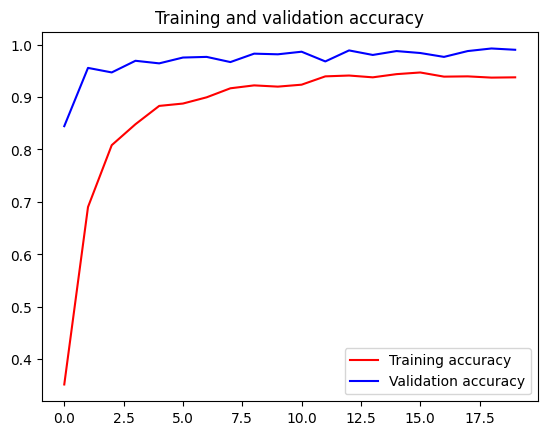

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

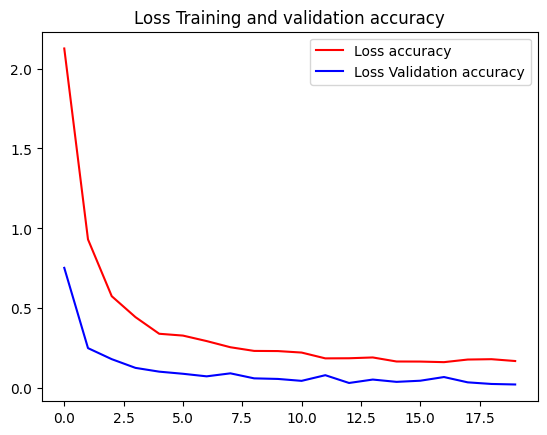

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Loss accuracy')
plt.plot(epochs, val_loss, 'b', label='Loss Validation accuracy')
plt.title('Loss Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [15]:
import numpy as np
from sklearn.metrics import classification_report

test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator untuk data pelatihan
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/testing',
    target_size=(150,150),
    batch_size=32,  # Anda dapat menyesuaikan batch_size sesuai kebutuhan Anda
    class_mode='categorical',  # Pastikan class_mode sesuai dengan jenis klasifikasi Anda
    shuffle=False  # Set shuffle=False untuk menjaga urutan data tetap
)
from sklearn.metrics import classification_report
# Prediksi menggunakan model
predIdxs = model.predict(test_generator)

# Konversi prediksi ke label kelas
predIdxs = np.argmax(predIdxs, axis=1)

# Cetak laporan klasifikasi
print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

Found 810 images belonging to 18 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/26 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step

W0000 00:00:1717182048.637649      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        45
          ca       1.00      1.00      1.00        45
          da       1.00      1.00      1.00        45
          ga       1.00      0.89      0.94        45
          ha       1.00      1.00      1.00        45
          ja       1.00      0.98      0.99        45
          ka       1.00      1.00      1.00        45
          la       1.00      1.00      1.00        45
          ma       1.00      1.00      1.00        45
          na       1.00      1.00      1.00        45
         nga       0.90      1.00      0.95        45
         nya       1.00      1.00      1.00        45
          pa       1.00      1.00      1.00        45
          ra       1.00      1.00      1.00        45
          sa       1.00      1.00      1.00        45
          ta       1.00      0.98      0.99        45
          wa       1.00      1.00      1

W0000 00:00:1717182051.233673      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [16]:
model.save('VGG19.h5')